In [4]:
from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
      el = $(this).find('.cm-comment:first')
      if (id == 0 || el.text() == '#hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Exercise

Solve this system of equations.

$$
\begin{equation}
  \begin{cases}
    y = x + 3 \\ 
    y - 12 = -2x 
  \end{cases}
\end{equation}
$$

In [8]:
from sympy import symbols, Eq, simplify
from sympy.plotting import plot
from sympy.interactive import printing


def ex():
    x, y = symbols('x y')
    x_ans = Eq(x, 0)
    y_ans = Eq(y, 0)

    eq1 = Eq(y, x + 3)
    eq2 = Eq(y - 12, -2*x)
    display(eq1)
    display(eq2)

    ### BEGIN SOLUTION
    # Solve for y in eq2
    eq2 = Eq(eq2.lhs + 12, eq2.rhs + 12)
    display(eq2)
    
    ### END SOLUTION
        
    return(x_ans, y_ans)


x_ans, y_ans = ex()  # Test out results

print('Your answer:')
display(x_ans)
display(y_ans)

Eq(y, x + 3)

Eq(y - 12, -2*x)

Eq(y, 12 - 2*x)

Your answer:


Eq(x, 0)

Eq(y, 0)

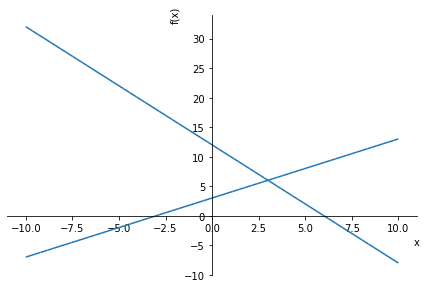

In [3]:
# Scratch area

from sympy.plotting import plot
%matplotlib inline

x, y = symbols('x y')

p1 = plot(x + 3, show=False)
p2 = plot(-2*x + 12, show=False)

p1.extend(p2)
p1.show()

In [ ]:
# hide_me

import unittest


class TestSystemEquations(unittest.TestCase):
#     assert 'ex' in locals(), 'Please keep the function name as `ex`'
#     assert (simplify(ex()) == Eq(symbols('x'), 11)), 'The final answer for x is incorrect'
#     assert '.lhs' in inspect.getsource(ex), 'You should use the lhs method to modify the left of the equation'
#     assert '.lhs' in inspect.getsource(ex), 'You should use the rhs method to modify the right of the equation'
#     assert 'solve' not in inspect.getsource(ex), 'Do not use the `solve()` function to get the answer'
#     assert type(ex()) == Eq, 'Your function should return an SymPy equation'

    def test_functionName(self):
        """Testing that you have this"""
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        """Another"""
        self.assertTrue('Fo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)


def suite():
    suite = unittest.TestSuite()
    suite.addTest(TestSystemEquations('test_functionName'))
    suite.addTest(TestSystemEquations('test_isupper'))
    suite.addTest(TestSystemEquations('test_split'))
    return suite


runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite())